In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Gauss-Markov model

We consider the linear dynamical system (without an input)
$$\begin{align}
    x_{t+1} {}={} & A_t x_t + G_t w_t,
    \\
    y_t {}={}     & C_t x_t + v_t,
  \end{align}$$
where $x_t\in{\rm I\!R}^{n_x}$ is the system state, $y_t\in{\rm I\!R}^{n_y}$ is the *output*, $w_t\in{\rm I\!R}^{n_w}$ is a noise term acting on the system dynamics known as *process noise*, and $v_t\in{\rm I\!R}^{n_v}$ is a measurement noise term.

Moreover, $A_t$, $G_t$, and $C_t$, are matrices of appropriate dimensions (sometimes, they are constant in time). Let us make some simplifying assumptions for this system.

**Assumptions:** (i) ${\rm I\!E}[w_t]=0$ and ${\rm I\!E}[v_t]=0$ for all $t\in{\rm I\!N}$, (ii) $x_0$, $(w_t)_t$ and $(v_t)_t$ are mutually independent random variables, (iii) $w_t$ and $v_t$ are normally distributed and ${\rm I\!E}[w_tw_t^\intercal]=Q_t$, ${\rm I\!E}[v_tv_t^\intercal]=R_t$. Lastly, $x_0$ is a random variable and (iv) $x_0 \sim \mathcal{N}(\tilde{x}_0, P_0)$. $\Box$

In [21]:
# This is a useful function: it plots contours of the pdf of the 2D normal distribution
def plot_2d_normal_pdf(mu, cov, alpha=1):
    dx1 = 3.5 * np.sqrt(cov[0, 0])
    dx2 = 3.5 * np.sqrt(cov[1, 1])
    x, y = np.mgrid[mu[0]-dx1:mu[0]+dx1:.05, mu[1]-dx2:mu[1]+dx2:.05]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal.pdf(pos, mu, cov)
    plt.contour(x, y, z, levels=10, alpha=alpha)

## Evolution of states

Define $\tilde{x}_t = {\rm I\!E}[x_t]$; then,
$$\begin{align}
  \tilde{x}_{t+1} {}={} & {\rm I\!E}[x_{t+1}] = {\rm I\!E}[A_tx_{t} + G_tw_t]
  {}={} A_t {\rm I\!E}[x_t]
  {}={} A_t \tilde{x}_t.
\end{align}$$
Define $P_{t} = {\rm Var}[x_t]$. Then,
$$P_{t+1} {}={} A_t P_t A_t^\intercal + G_t{}Q_t{}G_t^\intercal.$$

### Example 1

Consider the system
$$x_{t+1} = \begin{bmatrix}\phantom{-}0.5& 0.3\\ -0.2& 0.5\end{bmatrix}x_t + w_t,$$
where the process noise satisfies
$$w_t \sim \mathcal{N}\left(0, \begin{bmatrix}0.10& 0.05\\ 0.05& 0.15\end{bmatrix}\right),$$
and the initial condition
$$x_0\sim\mathcal{N}\left(\begin{bmatrix}\phantom{-}5\\ -1\end{bmatrix}, \begin{bmatrix}0.9 & 0.4\\0.4& 0.3\end{bmatrix}\right).$$

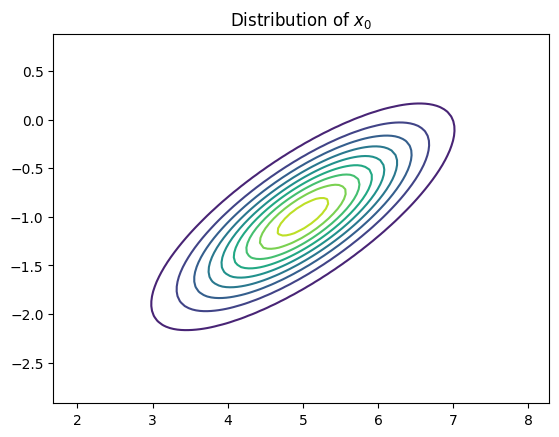

In [22]:
Q = np.array([[0.1, 0.05],[0.05, 0.15]])
P0 = np.array([[0.9, 0.4],[0.4, 0.3]])
x0_tilde = np.array([5, -1])
plot_2d_normal_pdf(x0_tilde, P0)
plt.title('Distribution of $x_0$')
plt.show()

We know that $\tilde{x}_1=A\tilde{x}_0$ and $P_1 = AP_0A^\intercal + Q$, and
$$x_1 \sim \mathcal{N}(\tilde{x}_1, P_1).$$
Let us compute $\tilde{x}_1$ and $P_1$ and then let's plot the pdf of $x_1$.

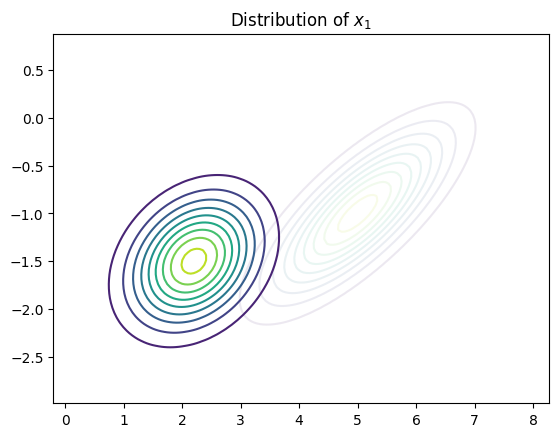

In [25]:
A = np.array([[0.5, 0.3], [-0.2, 0.5]])
x1_tilde = A @ x0_tilde
P1 = A @ P0 @ A.T + Q
plot_2d_normal_pdf(x0_tilde, P0, alpha=0.1)
plt.title('Distribution of $x_1$')
plot_2d_normal_pdf(x1_tilde, P1)
plt.show()

**Exercise:** Plot the distribution of $x_2$.

In [ ]:
# Your code goes here

**Exercise:** Using a `for` loop, plot the distributions of $x_0,\ldots, x_{10}$.

In [ ]:
# Your code goes here

## Outputs

For the output we have $y_t = C_tx_t + v_t$, so
$${\rm I\!E}[y_t] = C_t{\rm I\!E}[x_t] = C_t\tilde{x}_t,$$
and
$${\rm Var}[y_t] = {\rm Var}[C_tx_t + v_t] = C_t P_t C_t^\intercal + R_t.$$
We, therefore, have that $y_t \sim \mathcal{N}(C_t\tilde{x}_t, C_t P_t C_t^\intercal + R_t)$.
Moreover,
$${\rm Cov}(x_t, y_t)={\rm Cov}(x_t, C_t x_t + v_t)=P_t C_t.$$
**Question:** What is the distribution of $(x_t, y_t)$?

### Example 2

Consider the same dynamical system as in Example 1 and let $C=[1 ~~ 0]$. Suppose also that $R=0.7$. We can then determine the distribution of $y_0$ as follows



In [30]:
# Problem data
C = np.array([[1, 0]])
R = 0.7
# Expectation and variance of y0
y0_expect = C @ x0_tilde
y0_var = C @ P0 @ C.T + R
# Expectation and variance of y1
y1_expect = C @ x0_tilde
y1_var = C @ P0 @ C.T + R

**Exercise:** Using a `for` loop, determine the mean and variance of $y_0, \ldots, y_{10}$.

In [ ]:
# Your code goes here